In [1]:
!unzip Imatges_bo.zip


Archive:  Imatges_bo.zip
   creating: Imatges/
   creating: Imatges/0/
  inflating: Imatges/0/charimg_0_1.jpg  
  inflating: Imatges/0/charimg_10_3.jpg  
  inflating: Imatges/0/charimg_12_0.jpg  
  inflating: Imatges/0/charimg_14_3.jpg  
  inflating: Imatges/0/charimg_15_1.jpg  
  inflating: Imatges/0/charimg_17_1.jpg  
  inflating: Imatges/0/charimg_17_2.jpg  
  inflating: Imatges/0/charimg_17_3.jpg  
  inflating: Imatges/0/charimg_21_2.jpg  
  inflating: Imatges/0/charimg_22_0.jpg  
  inflating: Imatges/0/charimg_26_0.jpg  
  inflating: Imatges/0/charimg_26_2.jpg  
  inflating: Imatges/0/charimg_29_0.jpg  
  inflating: Imatges/0/charimg_2_0.jpg  
  inflating: Imatges/0/charimg_30_3.jpg  
  inflating: Imatges/0/charimg_35_1.jpg  
  inflating: Imatges/0/charimg_4_1.jpg  
  inflating: Imatges/0/charimg_6_1.jpg  
  inflating: Imatges/0/charimg_7_4.jpg  
   creating: Imatges/1/
  inflating: Imatges/1/charimg_10_1.jpg  
  inflating: Imatges/1/charimg_19_0.jpg  
  inflating: Imatges/1/chari

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
def plot_predictions(X_test, y_test, y_pred, num_classes):
    class_examples = {}

    for i in range(len(y_test)):
        label = y_test[i]
        if label not in class_examples:
            class_examples[label] = (X_test[i], y_test[i], y_pred[i])
        if len(class_examples) == num_classes:
            break


    cols = 10
    rows = (num_classes + cols - 1) // cols

    plt.figure(figsize=(15, rows * 1.5))

    for idx, (label, (img, true_label, pred_label)) in enumerate(class_examples.items()):
        plt.subplot(rows, cols, idx + 1)
        img = img.permute(1, 2, 0).numpy() * 0.5 + 0.5
        plt.imshow(img)
        plt.axis('off')
        labels = "0123456789BCDFGHJKLMNPRSTVWXYZ"
        plt.title(f"Real: {labels[int(true_label)]}\nPred: {labels[int(pred_label)]}")

    plt.tight_layout()
    plt.show()

In [4]:
# Hyperparameters
batch_size = 32
learning_rate = 0.001
num_epochs = 10
num_classes = len("0123456789BCDFGHJKLMNPRSTVWXYZ")
k_folds = 5

In [5]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

dataset = datasets.ImageFolder(root='Imatges', transform=transform)


In [6]:
class CharacterCNN(nn.Module):
    def __init__(self, num_classes):
        super(CharacterCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 16 * 16)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


Fold 1/5
Epoch [1/10], Loss: 3.1955
Epoch [2/10], Loss: 2.2742
Epoch [3/10], Loss: 1.4576
Epoch [4/10], Loss: 0.9585
Epoch [5/10], Loss: 0.6379
Epoch [6/10], Loss: 0.5321
Epoch [7/10], Loss: 0.3198
Epoch [8/10], Loss: 0.2733
Epoch [9/10], Loss: 0.2187
Epoch [10/10], Loss: 0.1423
Fold 1 Validation Accuracy: 92.31%


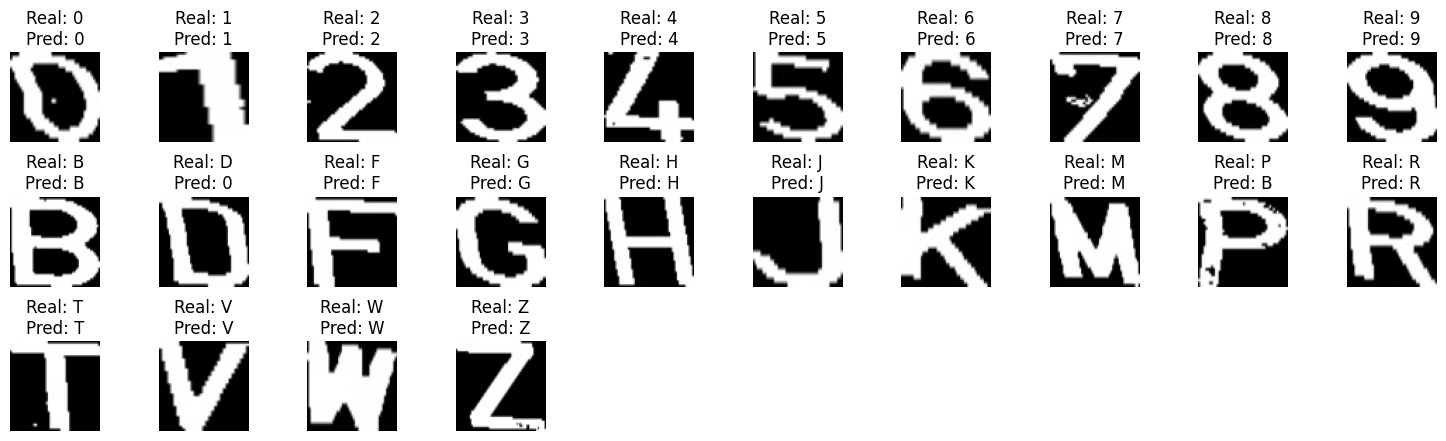

Fold 2/5
Epoch [1/10], Loss: 3.2765
Epoch [2/10], Loss: 2.3316
Epoch [3/10], Loss: 1.5584
Epoch [4/10], Loss: 1.0503
Epoch [5/10], Loss: 0.5455
Epoch [6/10], Loss: 0.3774
Epoch [7/10], Loss: 0.3098
Epoch [8/10], Loss: 0.2352
Epoch [9/10], Loss: 0.1992
Epoch [10/10], Loss: 0.2300
Fold 2 Validation Accuracy: 96.15%


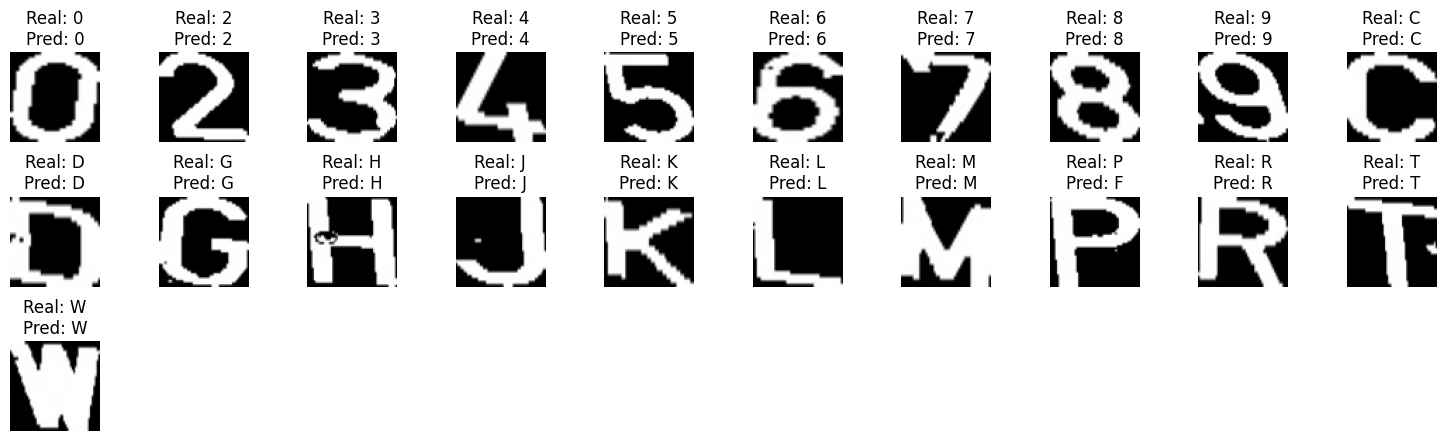

Fold 3/5
Epoch [1/10], Loss: 3.1975
Epoch [2/10], Loss: 2.3718
Epoch [3/10], Loss: 1.6992
Epoch [4/10], Loss: 1.1637
Epoch [5/10], Loss: 0.8266
Epoch [6/10], Loss: 0.6141
Epoch [7/10], Loss: 0.3686
Epoch [8/10], Loss: 0.3597
Epoch [9/10], Loss: 0.2826
Epoch [10/10], Loss: 0.1929
Fold 3 Validation Accuracy: 92.31%


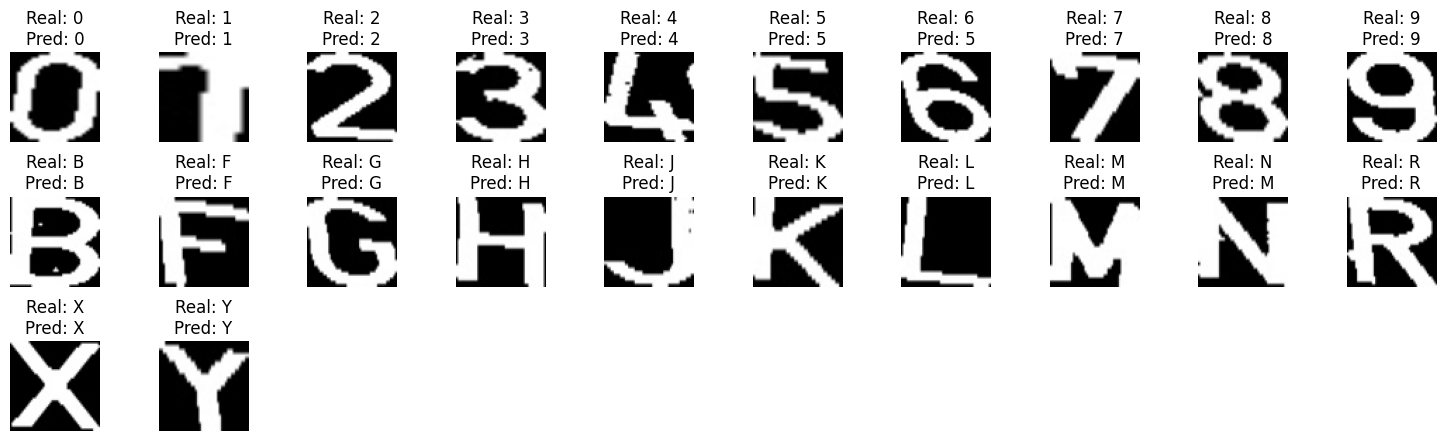

Fold 4/5
Epoch [1/10], Loss: 3.2303
Epoch [2/10], Loss: 2.1420
Epoch [3/10], Loss: 1.3904
Epoch [4/10], Loss: 0.7890
Epoch [5/10], Loss: 0.6138
Epoch [6/10], Loss: 0.3619
Epoch [7/10], Loss: 0.2707
Epoch [8/10], Loss: 0.3148
Epoch [9/10], Loss: 0.1616
Epoch [10/10], Loss: 0.1738
Fold 4 Validation Accuracy: 98.04%


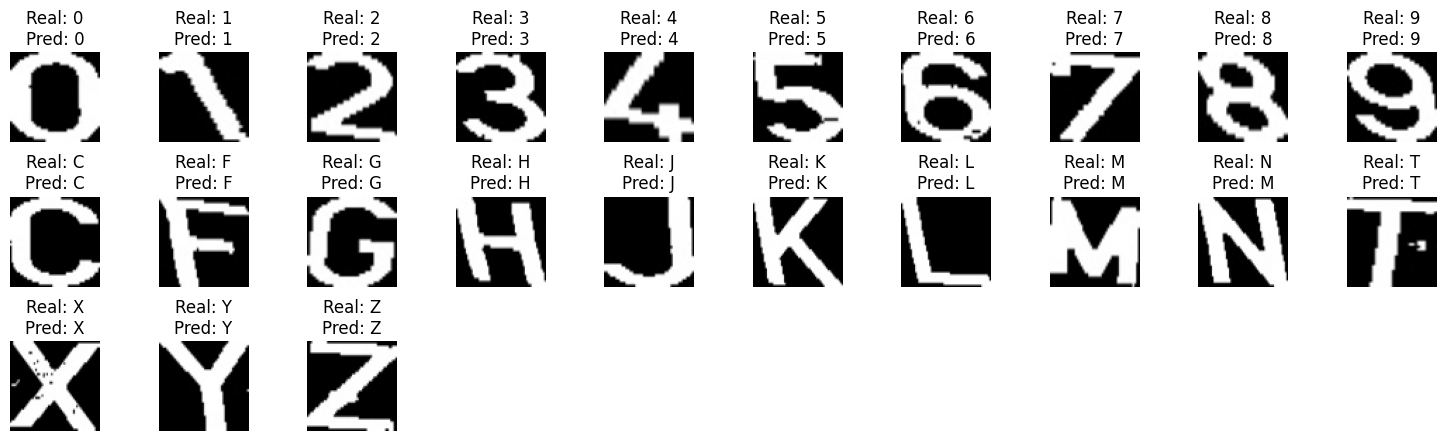

Fold 5/5
Epoch [1/10], Loss: 3.3721
Epoch [2/10], Loss: 2.3753
Epoch [3/10], Loss: 1.5986
Epoch [4/10], Loss: 1.0969
Epoch [5/10], Loss: 0.7862
Epoch [6/10], Loss: 0.4525
Epoch [7/10], Loss: 0.4835
Epoch [8/10], Loss: 0.3996
Epoch [9/10], Loss: 0.3496
Epoch [10/10], Loss: 0.3118
Fold 5 Validation Accuracy: 92.16%


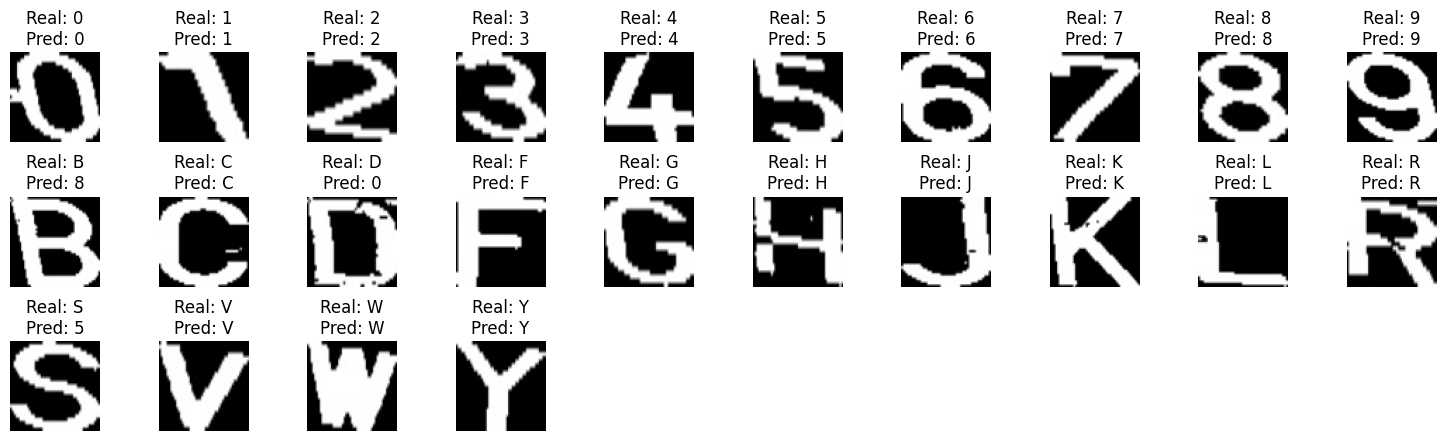

Cross-validation accuracy per fold: [92.3076923076923, 96.15384615384616, 92.3076923076923, 98.03921568627452, 92.15686274509804]
Average cross-validation accuracy: 94.19%
Confidence interval for the accuracy: 92.05% to 96.34%


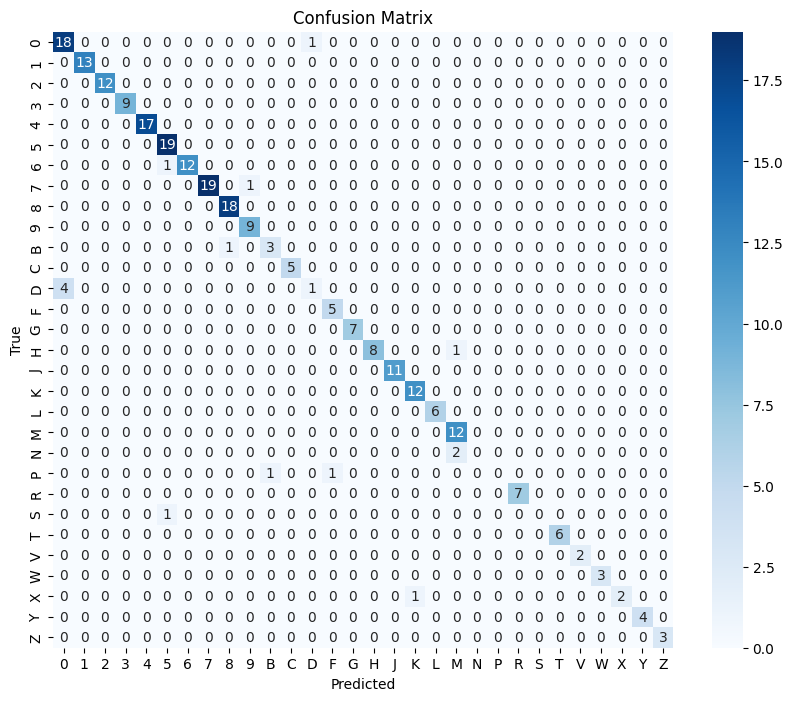

In [8]:
kfold = KFold(n_splits=k_folds, shuffle=True)

fold_accuracies = []
all_true_labels = []
all_pred_labels = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(dataset)):
    print(f'Fold {fold + 1}/{k_folds}')

    train_subset = Subset(dataset, train_idx)
    val_subset = Subset(dataset, val_idx)

    train_loader = DataLoader(dataset=train_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(dataset=val_subset, batch_size=batch_size, shuffle=False)

    model = CharacterCNN(num_classes=num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

    model.eval()
    correct = 0
    total = 0
    val_images = []
    val_true_labels = []
    val_pred_labels = []

    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_true_labels.extend(labels.cpu().numpy())
            all_pred_labels.extend(predicted.cpu().numpy())

            val_images.extend(images.cpu())
            val_true_labels.extend(labels.cpu().numpy())
            val_pred_labels.extend(predicted.cpu().numpy())

    fold_accuracy = 100 * correct / total
    fold_accuracies.append(fold_accuracy)
    print(f'Fold {fold+1} Validation Accuracy: {fold_accuracy:.2f}%')

    plot_predictions(val_images, val_true_labels, val_pred_labels, num_classes)
mean_accuracy = np.mean(fold_accuracies)
std_dev_accuracy = np.std(fold_accuracies)

sem = std_dev_accuracy / np.sqrt(k_folds)

confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_score * sem
confidence_interval = (mean_accuracy - margin_of_error, mean_accuracy + margin_of_error)

print(f'Cross-validation accuracy per fold: {fold_accuracies}')
print(f'Average cross-validation accuracy: {np.mean(fold_accuracies):.2f}%')
print(f'Confidence interval for the accuracy: {confidence_interval[0]:.2f}% to {confidence_interval[1]:.2f}%')

cm = confusion_matrix(all_true_labels, all_pred_labels)
labels = list("0123456789BCDFGHJKLMNPRSTVWXYZ")

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

torch.save(model.state_dict(), 'character_cnn_kfold.pth')
